# Webscraping using Python3

## * Webscraping:
Web scraping is about downloading structured data from the web, selecting some of that data, and passing along what you selected to another process.

Before we take a dive into the implemntation part, Let's look at the page we will be scraping. To do that we will run the following code.

My GitHub Profile: <a href = 'https://github.com/nileshredz'>Nilesh Ohol </a>👨‍💻

In [1]:
import webbrowser
webbrowser.open('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

print("Look at your Default Browser and now we will do the implementations")

Look at your Default Browser and now we will do the implementations


## 1. Tools for text processing
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 45%" src="https://assets.datacamp.com/production/project_38/img/Moby_Dick_p510_illustration.jpg"> </p>
<p>What are the most frequent words in Herman Melville's novel, Moby Dick, and how often do they occur?</p>
<p>In this notebook, we'll scrape the novel <em>Moby Dick</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a> (which contains a large corpus of books) using the Python package <code>requests</code>. Then we'll extract words from this web data using <code>BeautifulSoup</code>. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>) and <code>Counter</code>.</p>
<p>The <em>Data Science pipeline</em> we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.</p>
<p>Let's start by loading in the three main Python packages we are going to use.</p>

In [2]:
import requests  # To fetch the HTML file
from bs4 import BeautifulSoup # Extract words from the HTMl
import nltk # Process the text
from collections import Counter # Frequency of word.
import pandas as pd

print("-------------------All the required modules are imported----------------------")

-------------------All the required modules are imported----------------------


## 2. Request Moby Dick
<p>To analyze Moby Dick, we need to get the contents of Moby Dick from <em>somewhere</em>. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .</p>
<p><strong>Note</strong> that HTML stands for Hypertext Markup Language and is the standard markup language for the web.</p>
<p>To fetch the HTML file with Moby Dick we're going to use the <code>request</code> package to make a <code>GET</code> request for the website, which means we're <em>getting</em> data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into Python instead. </p>

In [3]:
url = "https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm"

r = requests.get(url)
r.encoding = 'utf-8'
html = r.text

print('----------------- These are the first 1000 characters in HTML file ------------------')
print(html[:1000])

----------------- These are the first 1000 characters in HTML file ------------------
<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-righ

## 3. Get the text from the HTML
<p>This HTML is not quite what we want. However, it does <em>contain</em> what we want: the text of <em>Moby Dick</em>. What we need to do now is <em>wrangle</em> this HTML to extract the text of the novel. For this we'll use the package <code>BeautifulSoup</code>.</p>
<p>Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called <code>BeautifulSoup</code>.</p>

In [4]:
text = BeautifulSoup(html).text

print('---------- These are the text characters between 10000 to 13000 characters -----------\n')
print(text[10000:13000])

---------- These are the text characters between 10000 to 13000 characters -----------

  and sung of Leviathan, by many nations and generations, including our
        own.
      

        So fare thee well, poor devil of a Sub-Sub, whose commentator I am. Thou
        belongest to that hopeless, sallow tribe which no wine of this world
        will ever warm; and for whom even Pale Sherry would be too rosy-strong;
        but with whom one sometimes loves to sit, and feel poor-devilish, too;
        and grow convivial upon tears; and say to them bluntly, with full eyes
        and empty glasses, and in not altogether unpleasant sadness—Give
        it up, Sub-Subs! For by how much the more pains ye take to please the
        world, by so much the more shall ye for ever go thankless! Would that I
        could clear out Hampton Court and the Tuileries for ye! But gulp down
        your tears and hie aloft to the royal-mast with your hearts; for your
        friends who have gone before

## 4. Extract the words
<p>We now have the text of the novel! There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.</p>
<p>Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use <code>nltk</code> – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.</p>

In [5]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+|\$[\d\.]+|\S+')
print("Tokenizer will split the string")

Tokenizer will split the string


In [6]:
token = tokenizer.tokenize(text)

print(f'Total number of words: {len(token)}')
print(token[0:8])

Total number of words: 254924
['Moby', 'Dick', ';', 'Or', 'the', 'Whale', ',', 'by']


## 5. Make the words lowercase
<p>OK! We're nearly there. Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in <em>Moby Dick</em> in which all capital letters have been made lower case.</p>

In [7]:
words_lower = []
for word in token:
    words_lower.append(word.lower())
    
print(words_lower[0:8])

['moby', 'dick', ';', 'or', 'the', 'whale', ',', 'by']


## 6. Load in stop words
<p>It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as <em>stop words</em>. The package <code>nltk</code> includes a good list of stop words in English that we can use.</p>

In [8]:
print(nltk.corpus.stopwords.words('english')[0:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


## 7. Remove stop words in Moby Dick
<p>We now want to create a new list with all <code>words</code> in Moby Dick, except those that are stop words (that is, those words listed in <code>sw</code>).</p>

In [9]:
stop_words = nltk.corpus.stopwords.words('english')

word_ns = [x for x in words_lower if x not in stop_words]

print(f"Total number of words without stop words are: {len(word_ns)}")
print(word_ns[0:8])

Total number of words without stop words are: 149798
['moby', 'dick', ';', 'whale', ',', 'herman', 'melville', 'body']


## 8. We have the answer
<p>Our original question was:</p>
<blockquote>
  <p>What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?</p>
</blockquote>
<p>We are now ready to answer that! Let's answer this question using the <code>Counter</code> class we imported earlier.</p>

In [10]:
count = Counter(word_ns)

top10 = count.most_common(10)

print(top10)

[(',', 17918), ('.', 7057), (';', 3968), ('’s', 1579), ('whale', 1233), ('!', 1127), ('one', 914), ('?', 585), ('like', 569), ('upon', 564)]


Plotting the graph for frquency


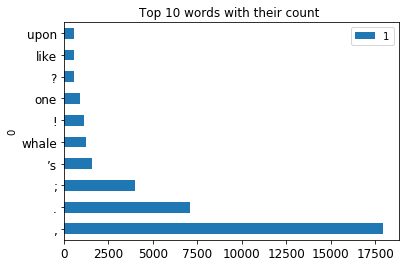

In [12]:
print("Plotting the graph for frquency")
pd.DataFrame(top10).plot(x = 0,y =1, kind = 'barh',title= "Top 10 words with their count ",fontsize = 12)
